# Classification 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# new import statements
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score

### IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris
- This set of data is used in beginning Machine Learning Courses
- You can train a ML algorithm to use the values to predict the class of iris
- Dataset link: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], \
                  columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [3]:
train, test = train_test_split(df, test_size=10, random_state=5)
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  
82   versicolor  
134   virginica  
114   virginica  
42       setosa  
109   virginica  
57   versicolor  
1        setosa  
70   versicolor  
25       setosa  
84   versicolor

### Three models
- Model 1: Predict petal width 
    - regression problem
- Model 2 - part a: Predict whether flower is "setosa"
    - classification problem, specifically binary classification: True / False
- Model 2 - part b: Predict probablity of flower being "setosa"
    - classification problem, probablity between 0 to 1

### Model 1: Predict petal width

- regression problem

In [4]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "petal width (cm)"

# 1. initialize model
reg_model = LinearRegression(fit_intercept=False)
# 2. fit using train data
reg_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["pet_width_predictions"] = reg_model.predict(test[xcols])
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  pet_width_predictions  
82   versicolor               1.327769  
134   virginica               1.590835  
114   virginica               1.279061  
42       setosa               0.083889  
109   virginica               1.889735  
57   versicolor               0.830818  
1        setosa               0.538569  
70   versicolor               1.155681  
25       setosa               0.610022  
84   versicolor               0.895833

## LogisticRegression

- classification model
- predict categorical labels

### Model 2 - part a: Predict whether flower is "setosa"

- classification problem, specifically binary classification: True / False

In [5]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

# 1. initialize model
cls_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
cls_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["setosa_predictions"] = cls_model.predict(test[xcols])
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  pet_width_predictions  setosa_predictions  
82   versicolor               1.327769               False  
134   virginica               1.590835               False  
114   virginica               1.279061               False  
42       setosa               0.083889                True  
109   virginica               1.889735               False  
57   versicolor               0.830818               False  
1        setosa               0.538569                True  
70   versicolor               1.155681               False  
25       setosa               0.610022                True  
84   versicolor               0.895833               False

### Model 2 - part b: Predict probablity of flower being "setosa"

- classification problem, probablity between 0 to 1

#### `<model object>.predict_proba(X)`

- Calibrated probabilities of classification.
- returns a numpy array of probabilities (that it is True):
    - [[False probablity, True probablity], ...]
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV.predict_proba

Extract just the True probablities.

In [6]:
test["setosa_prob"] = cls_model.predict_proba(test[xcols])[:, 1]
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  pet_width_predictions  setosa_predictions  setosa_prob  
82   versicolor               1.327769               False     0.059436  
134   virginica               1.590835               False     0.020274  
114   virginica               1.279061               False     0.085366  
42       setosa               0.083889                True     0.929430  
109   virginica               1.889735               False     0.066540  
57   versicolor               0.830818               False     0.147720  
1        setosa               0.538569                True     0.642771  
70   versicolor               1.155681               False     0.258519  
25       setosa               0.610022                True     0.585478  
84   versicolor               0.895833               False     0.349069

### Model 3: Predict variety of flower

- classification problem, specifically multi-class classification for `variety`

In [7]:
# PREDICT: which of the 3 varieties is a particular Iris?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

# 1. initialize model
mult_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
mult_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["variety_predictions"] = mult_model.predict(test[xcols])
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  pet_width_predictions  setosa_predictions  setosa_prob  \
82   versicolor               1.327769               False     0.059436   
134   virginica               1.590835               False     0.020274   
114   virginica               1.279061               False     0.085366   
42       setosa               0.083889                True     0.929430   
109   virginica               1.889735               False     0.066540   
57   versicolor               0.830818               False     0.147720   
1        setosa               0.538569                True     0.642771   
70   versicolor               1.155681               False     0.258519   
25       setosa               0.610022                True     0.585478   
84   versicolor               0.895833               False     0.349069   

    variety_predictions  
82           versicolor  
134           virginica  
114          versicolor  
42               setosa  
109           virginica  
57           versicolor  
1                setosa  
70           versicolor  
25               setosa  
84           versicolor

### Review: LinearRegression visualization

- recall that we would draw a "fit line" to visualize how well LinearRegression performs when there is only one input feature (X)
    - it was hard to draw a visualization when we had more than one input features (X)

### Visualize Decision Boundaries

- we can draw something called "decision boundaries" to visualize how well LogisticRegression performs when we only hae two input variables. For example: sepal length and sepal width.

<div>
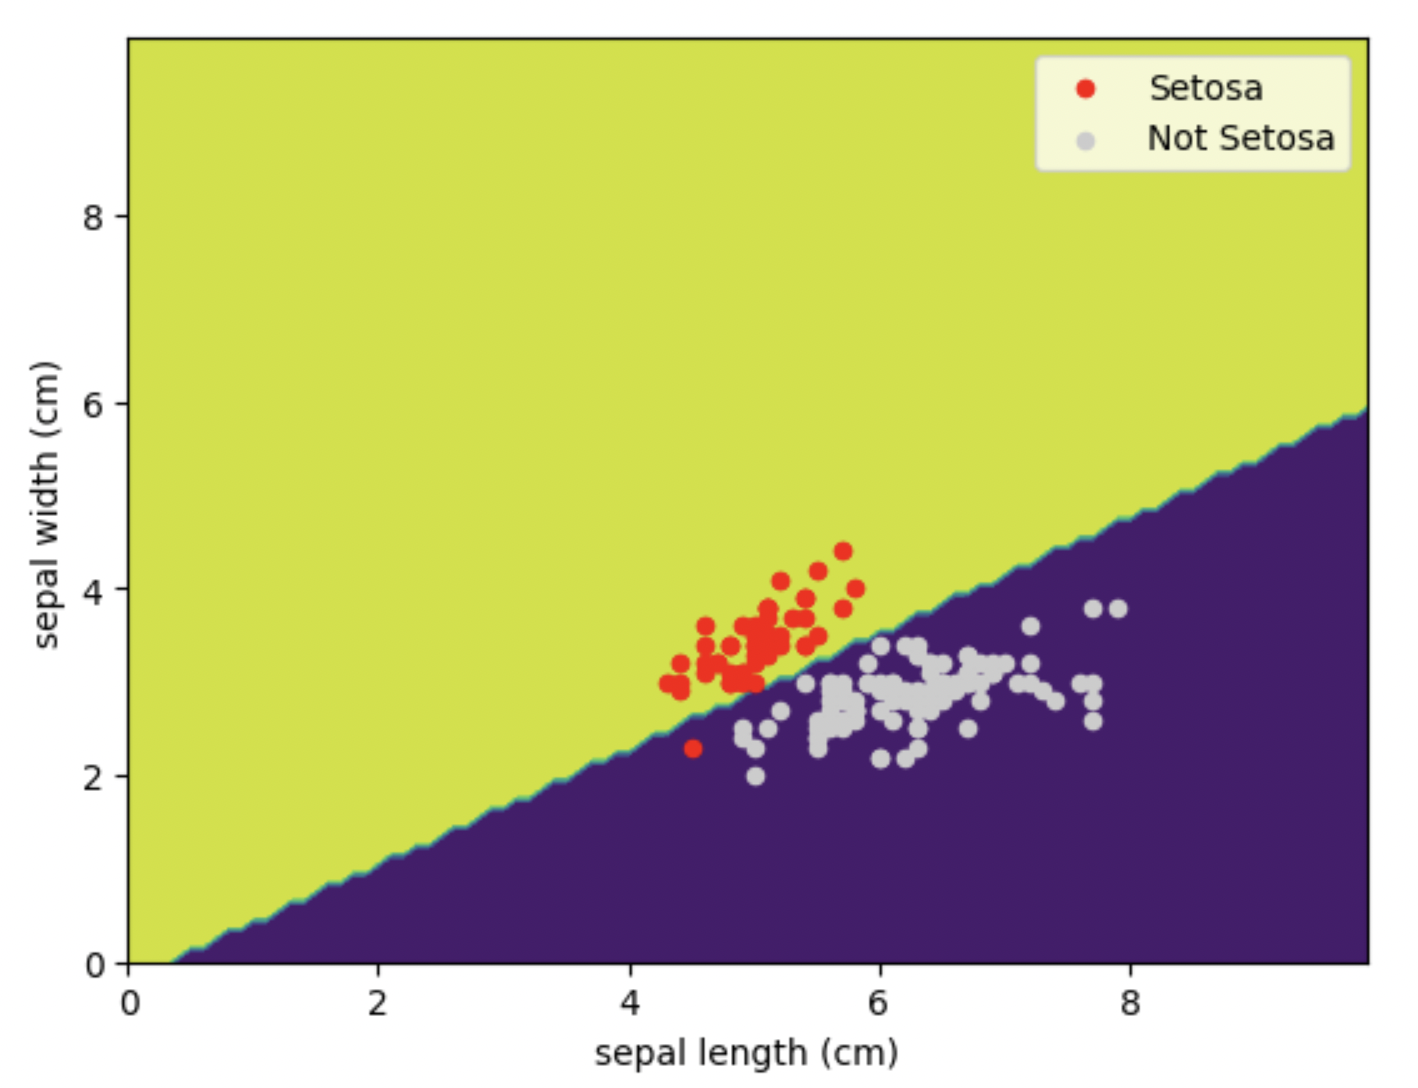
</div>

Recall that we can use `np.arange` to generate a range of numbers.

In [8]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### `np.meshgrid(x1, x2, ...)`

- Make N-D coordinate arrays given one-dimensional coordinate arrays x1, x2,…, xn.
- Returns an array of arrays.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [9]:
X, Y = np.meshgrid(np.arange(10), np.arange(10))

In [10]:
# in each cell, the number is the x-coordinate of that position
X 

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [11]:
# in each cell, the number is the y-coordinate of that position
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

#### `Z = F(X, Y)`, where `F(X, Y) = X * Y`

In [12]:
Z = X * Y    
Z

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

### Contour visualizations

- enables us to visualize a 3-D structure like a mountain using 2-D visualization
- example: https://en.wikipedia.org/wiki/Contour_line#/media/File:Contour2D.svg
- for classification result:
    - we have True / False
    - so we will have a contour that has two plateaus:
        - a higher plateau for True
        - a lower plateau for False
    - x and y-coordinates will be the input features
        
### `plt.contourf(X, Y, Z, levels=<num>)`

- enables us to produce contour lines and filled contours
    - larger the number => brighter the color
- `levels`: determines the number and positions of the contour lines / regions
- documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html

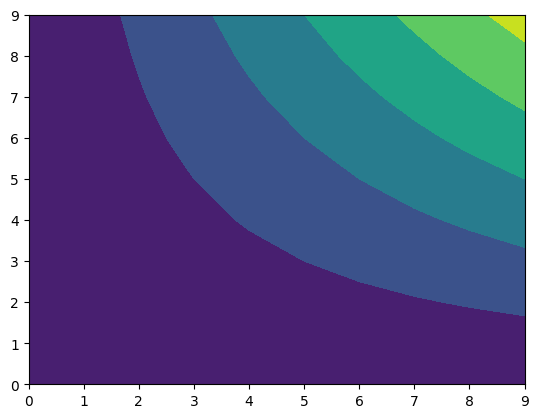

In [13]:
# countourf plot with X, Y, Z
plt.contourf(X, Y, Z)

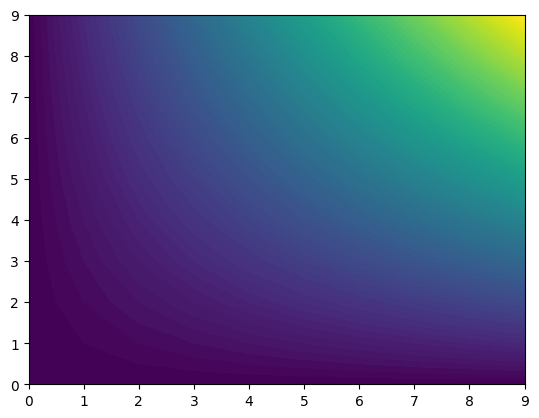

In [14]:
# higher granularity, by adding levels=100
plt.contourf(X, Y, Z, levels=100)

In [15]:
cls_model

LogisticRegression(fit_intercept=False)

In [16]:
df[xcols]

sepal length (cm)  sepal width (cm)  const
0                  5.1               3.5      1
1                  4.9               3.0      1
2                  4.7               3.2      1
3                  4.6               3.1      1
4                  5.0               3.6      1
..                 ...               ...    ...
145                6.7               3.0      1
146                6.3               2.5      1
147                6.5               3.0      1
148                6.2               3.4      1
149                5.9               3.0      1

[150 rows x 3 columns]

#### `predictions = F(sepl, sepw)`

In [17]:
# Creating range of values for sepl (X) and sepw (Y)
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
sepl

array([[0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       ...,
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9]])

#### `predictions = F(sepl, sepw)`

In [18]:
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})
predict_df.head()

sepal length (cm)  sepal width (cm)  const
0                0.0               0.0      1
1                0.1               0.0      1
2                0.2               0.0      1
3                0.3               0.0      1
4                0.4               0.0      1

In [19]:
# Predicting setosa (True / False) labels using LogisticRegression model
Z_predictions = cls_model.predict(predict_df)
Z_predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [20]:
print(sepl.shape)
print(sepw.shape)
print(Z_predictions.shape)

(100, 100)
(100, 100)
(10000,)


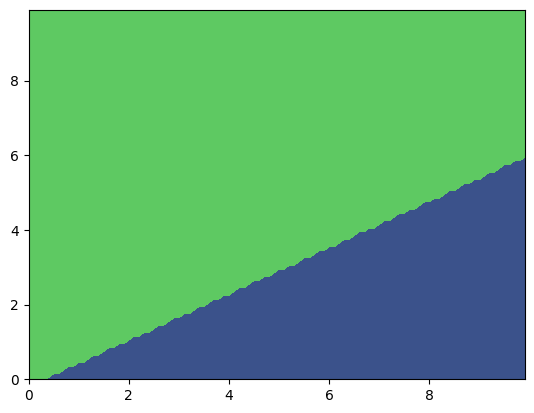

In [21]:
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))

#### How can we extract `AxesSubplot` object instance? We need to use a function called `plt.gca()`.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

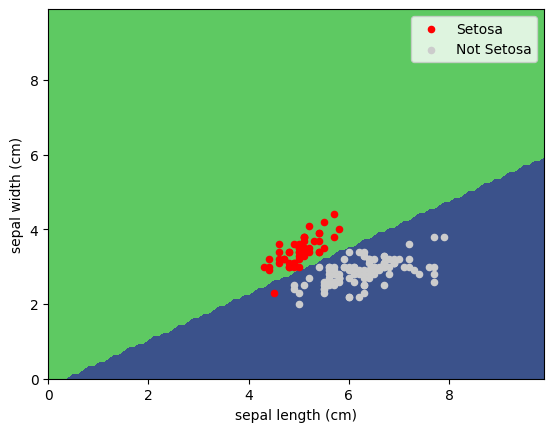

In [22]:
# Creating contourf plot
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
ax = plt.gca()   # get current axes subplot
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                              ax=ax, color="r", label="Setosa")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                               ax=ax, color="0.8", label="Not Setosa")

#### Visualizing Multiple-classification Boundaries (self-study example)

In [23]:
classes_ = list(mult_model.classes_)
classes_

['setosa', 'versicolor', 'virginica']

In [24]:
classes_.index("versicolor")

1

In [25]:
# we need numeric values for Z
# hence .index usage instead of actual values of variety predictions
predictions = np.array([classes_.index(name) for name in mult_model.predict(predict_df)])
predictions

array([1, 1, 1, ..., 0, 0, 0])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

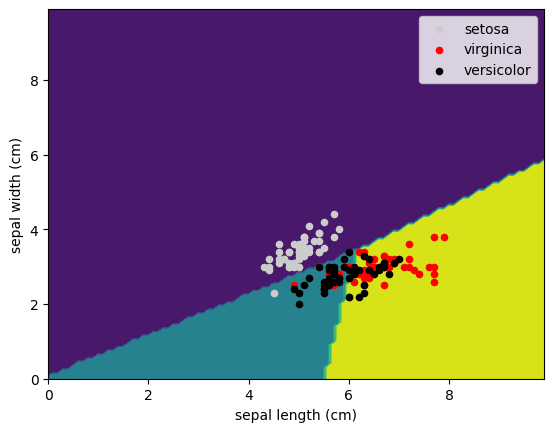

In [26]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                           ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                              ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                               ax=ax, label="versicolor", color="k")

#### Can we do better by creating a `Pipeline` of `PolynomialFeatures` and `LogisticRegression` models?

In [27]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=10, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train[ycol])

Pipeline(steps=[('pf', PolynomialFeatures(degree=10, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

In [28]:
# Creating range of values for sepl (X) and sepw (Y)
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})
# Predicting setosa (True / False) labels using LogisticRegression model
Z_predictions = model.predict(predict_df)
Z_predictions

array([ True,  True,  True, ...,  True,  True,  True])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

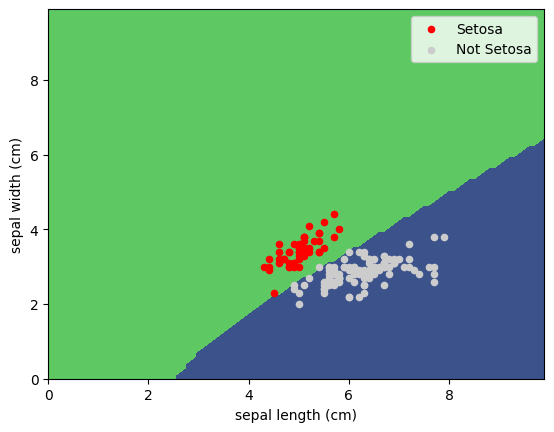

In [29]:
# Creating contourf plot
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
ax = plt.gca()
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                              ax=ax, color="r", label="Setosa")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                               ax=ax, 
                               color="0.8", label="Not Setosa")

#### Multi-classification model to predict `variety` using  `Pipeline` of `PolynomialFeatures` and `LogisticRegression` models

In [30]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train[ycol])

/home/gurmail.singh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

#### LogisticRegression uses an "iterative algorithm"

- chooses some random coefficients
- LOOP (some fixed number of iterations/"epochs")
    - tweaks the coefficients to get slightly better accuracy
    - if accuarcy isn't improving much:
        - exit the loop early

#### Solution 1: increase number of iterations

In [31]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=1000)),
])
model.fit(train[xcols], train[ycol])

/home/gurmail.singh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False, max_iter=1000))])

In [32]:
# Predicting variety labels using LogisticRegression model
predictions = np.array([classes_.index(name) for name in model.predict(predict_df)])
predictions

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

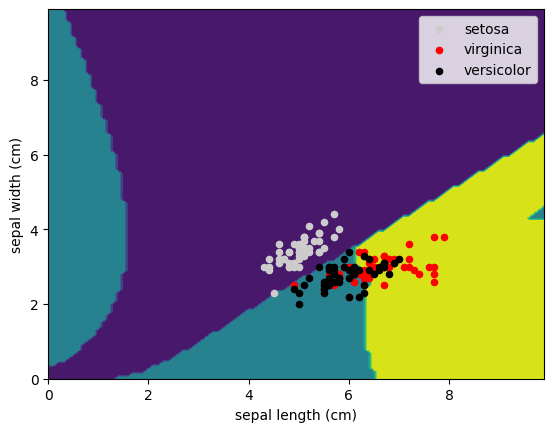

In [33]:
# Creating contourf plot
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                           ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                              ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                               ax=ax, label="versicolor", color="k")

#### Solution 2: Transform the data into something LogisticRegression can learn from more quickly

- LogisticRegression likes data that is standardized:
    1. "small" numbers
    2. "centered" numbers (average of the column is 0)

In [34]:
a = np.array([1, 2, 8, 9])
a

array([1, 2, 8, 9])

How do we get "centered" numbers?

In [35]:
a - a.mean()

array([-4., -3.,  3.,  4.])

How do we get "small" numbers?

In [36]:
a / 10

array([0.1, 0.2, 0.8, 0.9])

In [37]:
a / a.std()

array([0.28284271, 0.56568542, 2.2627417 , 2.54558441])

In [38]:
# LogisticRegression would like to learn from a column of data that looks like this
(a - a.mean()) / a.std()

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

### `StandardScaler`

- requires import: `from sklearn.preprocessing import StandardScaler`

In [39]:
StandardScaler().fit_transform(a.reshape(-1, 1))

array([[-1.13137085],
       [-0.84852814],
       [ 0.84852814],
       [ 1.13137085]])

#### Recommendations: 

1. Always use StandardScaler with LogisticRegression
2. PolynomialFeatures should be BEFORE StandardScaler (when using both)

In [40]:
# solution 2: use StandardScaler
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=100)),
])
model.fit(train[xcols], train[ycol])

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('std', StandardScaler()),
                ('lr', LogisticRegression(fit_intercept=False))])

In [41]:
predictions = np.array([classes_.index(name) for name in model.predict(predict_df)])
predictions

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

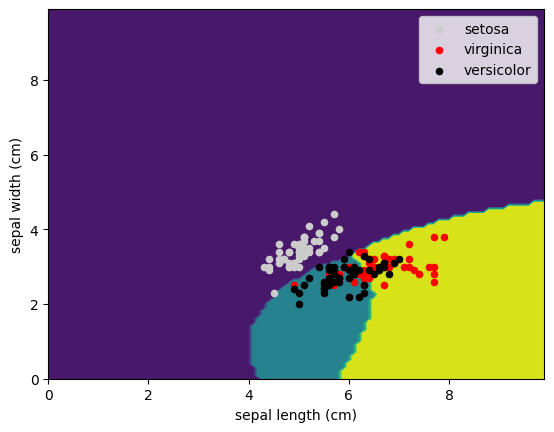

In [42]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                           ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                              ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", \
                                               ax=ax, label="versicolor", color="k")

Why should we use `PolynomialFeatures` before `StandardScaler`?

1. Data won't be centered if second step is `PolynomialFeatures`
2. Also, when you square after standardization, small and large numbers have same value.

In [43]:
a

array([1, 2, 8, 9])

In [44]:
scaled = (a - a.mean()) / a.std()   # like StandardScaler
scaled

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

In [45]:
scaled ** 2   # like PolynomialFeatures

array([1.28, 0.72, 0.72, 1.28])

As opposed to that, if we do `PolynomialFeatures` first and then `StandardScalar` next, we will get what we want.

In [46]:
a

array([1, 2, 8, 9])

In [47]:
squared_a = a ** 2 # like PolynomialFeatures
squared_a

array([ 1,  4, 64, 81])

In [48]:
(squared_a - squared_a.mean()) / squared_a.std()   # like StandardScaler

array([-1.02735414, -0.94291407,  0.74588725,  1.22438096])

### Scoring and Metrics

- https://scikit-learn.org/0.15/modules/model_evaluation.html
- import statements:
```python
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
```

In [49]:
# pattern: positive => True, negative => False
df = pd.DataFrame([
    [15, True],
    [-2, False],
    [99, True],
    [-10, False],
    [8, True],
    [5, True],
    [-1000, False],
    [-1, False],
], columns=["x", "y"])
train, test = df.iloc[:4], df.iloc[4:]

In [50]:
train

x      y
0  15   True
1  -2  False
2  99   True
3 -10  False

In [51]:
test

x      y
4     8   True
5     5   True
6 -1000  False
7    -1  False

In [52]:
model = LogisticRegression()
model.fit(train[["x"]], train["y"])
model.predict(test[["x"]])

array([ True, False, False, False])

In [53]:
# by default, this uses accuracy_score
model.score(test[["x"]], test["y"])   

0.75

#### `accuracy_score(y_true, y_pred)`

- same result as invoking `score` method
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [54]:
# simple example
accuracy_score(["A", "B"], ["A", "C"])

0.5

In [55]:
accuracy_score(test["y"], model.predict(test[["x"]]))

0.75

What are the range of values of `accuracy_score` for a classification model?
- `0 to 1` because it is a fraction of predicted labels / actual labels => remember you can either get it correct or wrong.
- Recall as opposed to classification, for regression range for R^2 score is `-infinity to 1` => that is because the model can introduce non-existent variance within the data while trying to fit it!

#### Confusion Matrices

#### `confusion_matrix(y_true, y_pred)`

- computes confusion matrix for classification:
    - row dimension represents actual value
    - column dimension represents predicted value
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

<div>
<img src="Confusion_matrix.png" width="500"/>
</div>

In [56]:
actual =    ["dog", "dog", "dog", "dog", "cat", "cat", "cat", "mouse", "mouse"]
predicted = ["dog", "dog", "dog", "cat", "cat", "dog", "cat", "mouse", "mouse"]

In [57]:
# ROW: an actual category
# COL: a prediction
confusion_matrix(actual, predicted)

array([[2, 1, 0],
       [1, 3, 0],
       [0, 0, 2]])

In [58]:
# notice that we have a "horse" label even though the data doesn't have any info about horse
labels = ["dog", "cat", "mouse", "horse"]
cm = confusion_matrix(actual, predicted, labels=labels)
cm

array([[3, 1, 0, 0],
       [1, 2, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 0]])

In [59]:
pd.DataFrame(cm, index=labels, columns=labels)

dog  cat  mouse  horse
dog      3    1      0      0
cat      1    2      0      0
mouse    0    0      2      0
horse    0    0      0      0

In [60]:
actual =    ["dog", "dog", "dog", "dog", "cat", "cat", "cat", "cat", "mouse", "mouse"] * 199
predicted = ["dog", "dog", "dog", "dog", "cat", "dog", "cat", "dog", "mouse", "mouse"] * 199
actual += ["horse"] * 10
predicted += ["dog"] * 9 + ["horse"]

labels = ["dog", "cat", "mouse", "horse"]
cm = confusion_matrix(actual, predicted, labels=labels)
cm = pd.DataFrame(cm, index=labels, columns=labels)
cm

dog  cat  mouse  horse
dog    796    0      0      0
cat    398  398      0      0
mouse    0    0    398      0
horse    9    0      0      1

### Recall and balanced accuracy score

- import statement:
```python
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score
```

#### Recall: row-wise ratio

- What proportion of actual positives was identified correctly?

In [61]:
# what is the recall for cat?
cm.at["cat", "cat"] / cm.loc["cat", :].sum()

0.5

In [62]:
# There are multiple recall scores as we have multiple labels
# So, we need to pass argument to parameter "average"
recall_score(actual, predicted)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [63]:
recall_score(actual, predicted, average=None)

array([0.5, 1. , 0.1, 1. ])

In [64]:
# How can we identify which score is for which label?
print(labels)
# We can pass a list of labels argument to parameter "labels"
recall_score(actual, predicted, average=None, labels=labels)

['dog', 'cat', 'mouse', 'horse']


array([1. , 0.5, 1. , 0.1])

In [65]:
cm

dog  cat  mouse  horse
dog    796    0      0      0
cat    398  398      0      0
mouse    0    0    398      0
horse    9    0      0      1

How does average recall score compare against accuracy score?

In [66]:
accuracy_score(actual, predicted)

0.7965

In [67]:
# will this be bigger or smaller than accuracy?
recall_score(actual, predicted, average=None, labels=labels).mean()

0.65

We are saying "horse" is equally important as other animals by taking an average of recall. So average recall score is lower than overall accuracy.

#### Average recall score is "Balanced accuracy score"

In [68]:
# average of recall scores is called balanced accuracy score
balanced_accuracy_score(actual, predicted)

0.65

Why does "Balanced accuracy score" matter?

- Imagine you are building a new covid test. We know majority of the times covid test is supposed to be negative.
- So, you might get a high accuracy even if your covid test is missing actual positives.
- If you just look at accuracy, that might be misleading. So, you must also look at "Balanced accuracy score".

### Precision: column-wise ratio

- What proportion of positive identifications was actually correct?

In [69]:
cm

dog  cat  mouse  horse
dog    796    0      0      0
cat    398  398      0      0
mouse    0    0    398      0
horse    9    0      0      1

In [70]:
print(labels)
precision_score(actual, predicted, average=None, labels=labels)

['dog', 'cat', 'mouse', 'horse']


array([0.66167914, 1.        , 1.        , 1.        ])

### Binary Classification Metrics

Unless otherwise specified, "precision" and "recall" refer to those metrics for the positive class when we're doing binary classification.

<div>
<img src="Confusion_matrix_binary.png" width="350"/>
</div>

In [71]:
actual = [False, True, True, True, True, False, False, True, True, True, True, True, True]
predicted = [False, True, True, True, True, True, True, False, False, False, True, True, True]
confusion_matrix(actual, predicted)

array([[1, 2],
       [3, 7]])

In [72]:
recall_score(actual, predicted, average=None, labels=[True, False])

array([0.7       , 0.33333333])

In [73]:
# for binary classification, we have False recall and True recall
# "recall" is shorthand for "True recall"
recall_score(actual, predicted)

0.7

In [74]:
precision_score(actual, predicted, average=None, labels=[True, False])

array([0.77777778, 0.25      ])

In [75]:
# for binary classification, we have False precision and True precision
# "precision" is shorthand for "True precision"
precision_score(actual, predicted)

0.7777777777777778